In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#Preprocessing The Data 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
cFeatures = [columns_name for columns_name in df.columns if df[columns_name].dtype == "O"]
print(f"the number of categorical features present in the dataset is {len(cFeatures)}  ")
print(f"the categorical features present are as follows {cFeatures} ") #Getting the categorical features of this Dataset 

the number of categorical features present in the dataset is 7  
the categorical features present are as follows ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [ ]:
nFeatures = [columns_name for columns_name in df.columns if df[columns_name].dtype != "O"]
print(f"the number of numerical features present in the dataset is {len(nFeatures)}  ")
print(f"the numerical features present are as follows {nFeatures} ") #getting the Numerical FEautures of dataset 

the number of numerical features present in the dataset is 16  
the numerical features present are as follows ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 


In [ ]:
for category in cFeatures:
    count = len(df[category].unique())
    print(f"the cardinality of the column {category} is {count} ") #Cardinality of the dataset

the cardinality of the column Date is 3436 
the cardinality of the column Location is 49 
the cardinality of the column WindGustDir is 17 
the cardinality of the column WindDir9am is 17 
the cardinality of the column WindDir3pm is 17 
the cardinality of the column RainToday is 3 
the cardinality of the column RainTomorrow is 3 


In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) 

df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
# then need to drop the "Date" column
df.drop("Date", axis = 1, inplace = True)

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [ ]:
cFeatures = [columns_name for columns_name in df.columns if df[columns_name].dtype == "O"]
print(f"the number of categorical features present in the dataset: {len(cFeatures)}  ")
print(f"the categorical features present are as follows {cFeatures} ") #Date is now removed from the categorical features 

the number of categorical features present in the dataset: 6  
the categorical features present are as follows ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [ ]:
df[cFeatures].isnull().sum() #To find out the number of Null VAlues present in the dataset 

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
categorical_nulls = [features for features in cFeatures if df[features].isnull().sum()] #For loop in whih this list will return the categorical values
for variable in categorical_nulls:
    df[variable] = df[variable].fillna(df[variable].mode()[0])  #Each feature is filled by most repeated value
df[cFeatures].isnull().sum()  

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
#Now we deal with the Null values in the Numerical Category 

nFeatures = [columns_name for columns_name in df.columns if df[columns_name].dtype != "O"]
print(f"the number of numerical features present in the dataset: {len(nFeatures)}  ")
print(f"the numerical features present are as follows {nFeatures} ")

the number of numerical features present in the dataset: 19  
the numerical features present are as follows ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day'] 


In [ ]:
num_null = df[nFeatures].isnull().sum()

num_null

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

In [ ]:
only_num_null = [column for column in nFeatures if df[column].isnull().sum()]
missing_num = df[only_num_null].isnull().sum() #Since year, month and day have no null values 

#We are assigning missing_num to be the null values dataframe

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


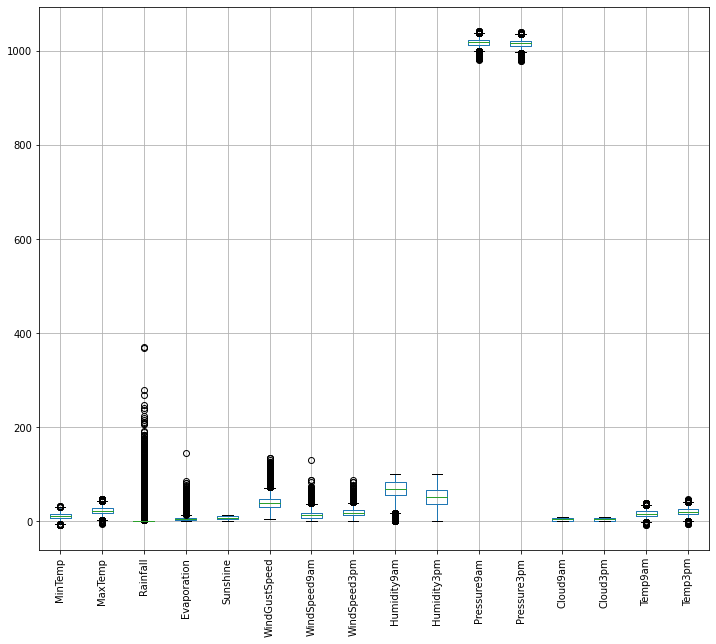

In [ ]:
#For numerical values we cannot immediately impute the null values we need to check for outliers first 

plt.figure(figsize=(12,10))
df.boxplot(only_num_null,rot = 90)

In [ ]:
#As we can see there a lot of outliers, we can handle this using the IQR methood 


for feature in only_num_null:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


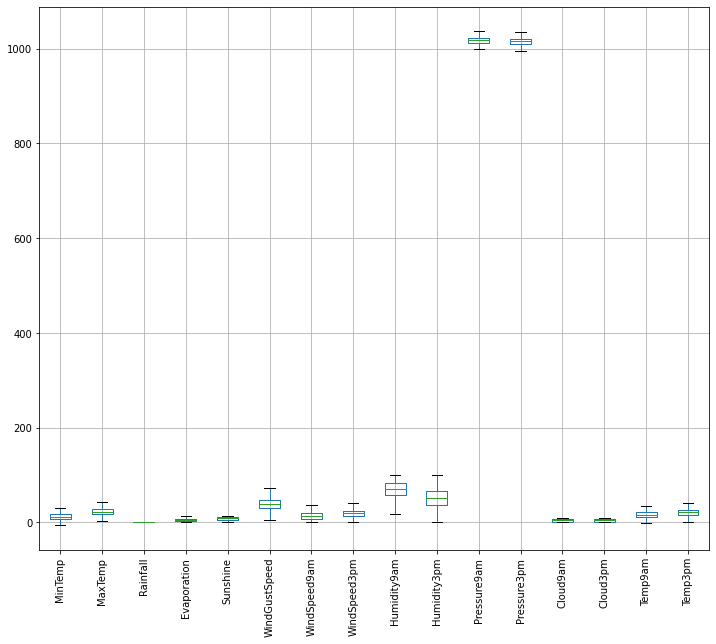

In [ ]:
plt.figure(figsize=(12,10))
df.boxplot(only_num_null,rot = 90) #Now the outliers have been taken care of 

In [ ]:
for features in only_num_null:
    df[features] = df[features].fillna(df[features].mean()) #Now we can fill in the missing values with the mean

df[only_num_null].isnull().sum() 

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

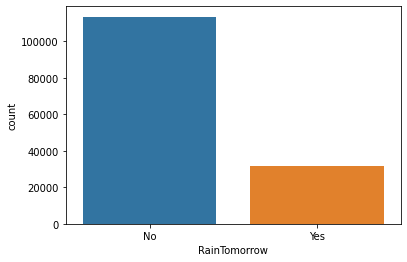

In [ ]:
sns.countplot(x = "RainTomorrow", data = df) #We can see that most days it did not rain the next day 

In [ ]:
categorical = [i for i in df.columns if df[i].dtype == "O"]

categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
def encoding(feature):
    mapping = {} 
    unique = list(df[feature].unique()) # getting unique qualitative values
    for index in range(len(unique)): 
        mapping[unique[index]] = index # converting to a numerical representation
    return mapping                     

# applying the function to our data
for category in categorical:
    df[category].replace(encoding(category), inplace = True)
    
print(df.head()) # and this finishes our encoding

   Location  MinTemp  MaxTemp  Rainfall  ...  RainTomorrow  year  month  day
0         0     13.4     22.9       0.6  ...             0  2008     12    1
1         0      7.4     25.1       0.0  ...             0  2008     12    2
2         0     12.9     25.7       0.0  ...             0  2008     12    3
3         0      9.2     28.0       0.0  ...             0  2008     12    4
4         0     17.5     32.3       1.0  ...             0  2008     12    5

[5 rows x 25 columns]


#Training 

In [ ]:

y = df["RainTomorrow"]  # dependent or target 
X = df.drop(["RainTomorrow"],axis = 1)  # indepedent or input

In [ ]:
smote_object = SMOTE()

X, y = smote_object.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
forest1 = RandomForestClassifier(n_estimators=1)50


forest1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
forest1_predictions = forest1.predict(X_test)
print("Accuracy: " + str(metrics.accuracy_score(y_test, forest1_predictions)*100) +"%")

Accuracy: 90.3360234776229%


In [ ]:
feature_importance = pd.Series(forest1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance 

#Checking out the feature Importance 


Humidity3pm      0.147568
Rainfall         0.109554
Cloud3pm         0.075991
Sunshine         0.066842
Cloud9am         0.050237
WindGustSpeed    0.050052
Pressure3pm      0.048508
Humidity9am      0.046758
Pressure9am      0.041574
Temp3pm          0.032199
MinTemp          0.032020
MaxTemp          0.031397
Temp9am          0.029365
WindSpeed3pm     0.028400
Location         0.027196
WindSpeed9am     0.026094
day              0.023899
Evaporation      0.022435
WindGustDir      0.021511
WindDir3pm       0.020567
month            0.020175
WindDir9am       0.018525
year             0.018110
RainToday        0.011024
dtype: float64

In [ ]:
X = X.drop(["RainToday", "year", "WindDir9am"],axis = 1) #Since these have a feature importance of less than 0.02

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
forest2 = RandomForestClassifier(n_estimators=200)
forest2.fit(X_train_2, y_train_2)

RandomForestClassifier(n_estimators=200)

In [ ]:
forest2_predictions = forest2.predict(X_test_2)

In [ ]:
print("Accuracy: " + str(metrics.accuracy_score(y_test_2, forest2_predictions)*100) +"%") #The accuracy went down 

Accuracy: 90.31841526045487%
